<a href="https://colab.research.google.com/github/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/multivariate-linear-regression/2D_function_expansion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using linear regression to fit a 2-dimensional function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import random

Consider a 2-dimensional function $\cos(x^2+y^2)$ in the domain $(x,y)\in [-1,1]^2$. In the following sections, we are going to fit it with polynomials of $x$ and $y$.

In [2]:
def test_func(x, y):
    return np.cos(x**2+y**2)

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


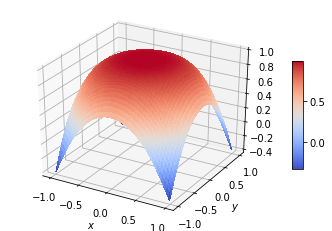

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
X = np.arange(-1, 1, 0.01)
Y = np.arange(-1, 1, 0.01)

X, Y = np.meshgrid(X, Y)
Z = test_func(X,Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
cset = ax.contour(X, Y, Z, zdir='z', offset=-4, cmap=cm.coolwarm)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

First, we randomly sample some data points from the graph, and save them for future fitting.

In [4]:
random.seed
with open('test_func_data.csv', mode='w') as sample_file:
    gravity_writer = csv.writer(sample_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    gravity_writer.writerow(['f(x,y)','x', 'y'])
    for i in range (0, 200):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        gravity_writer.writerow([test_func(x, y), x, y])

In [5]:
df = pd.read_csv('/content/test_func_data.csv')
print(df)

       f(x,y)         x         y
0    0.689962 -0.554481  0.708456
1    0.993603 -0.303724  0.144639
2    0.672775 -0.890726 -0.198623
3    0.631472 -0.140367 -0.931474
4    0.998396 -0.148312 -0.186169
..        ...       ...       ...
195  0.998748 -0.182850 -0.128922
196  0.921766 -0.449341 -0.443032
197  0.476730 -0.557863  0.873301
198  0.658709 -0.289611 -0.876253
199  0.490562 -0.621402  0.819707

[200 rows x 3 columns]


First we try the ansatz $f(x,y)=c_{0,0}+c_{1,0}x+c_{0,1}y+c_{2,0}x^2+c_{0,2}y^2+c_{3,0}x^3+c_{0,3}y^3$, and find all $c_{m,n}$ using gradient descent.

In [7]:
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x^3']=df['x']**3
df['y^3']=df['y']**3
print(df)

       f(x,y)         x         y       x^2       y^2       x^3       y^3
0    0.689962 -0.554481  0.708456  0.307450  0.501910 -0.170475  0.355582
1    0.993603 -0.303724  0.144639  0.092248  0.020921 -0.028018  0.003026
2    0.672775 -0.890726 -0.198623  0.793393  0.039451 -0.706696 -0.007836
3    0.631472 -0.140367 -0.931474  0.019703  0.867644 -0.002766 -0.808188
4    0.998396 -0.148312 -0.186169  0.021997  0.034659 -0.003262 -0.006452
..        ...       ...       ...       ...       ...       ...       ...
195  0.998748 -0.182850 -0.128922  0.033434  0.016621 -0.006113 -0.002143
196  0.921766 -0.449341 -0.443032  0.201908  0.196277 -0.090725 -0.086957
197  0.476730 -0.557863  0.873301  0.311211  0.762654 -0.173613  0.666027
198  0.658709 -0.289611 -0.876253  0.083875  0.767820 -0.024291 -0.672805
199  0.490562 -0.621402  0.819707  0.386141  0.671920 -0.239949  0.550778

[200 rows x 7 columns]


In [8]:
df = df.to_numpy()
x = df[:,1:7]
y = [df[:,0]]
x = np.array(x)
print(x)
y = np.array(y)
y = y.T
#print(y)

[[-0.55448147  0.70845635  0.3074497   0.5019104  -0.17047516  0.35558161]
 [-0.30372422  0.14463936  0.0922484   0.02092055 -0.02801808  0.00302593]
 [-0.89072596 -0.19862267  0.79339274  0.03945097 -0.70669551 -0.00783586]
 ...
 [-0.55786268  0.87330086  0.31121077  0.7626544  -0.17361287  0.66602675]
 [-0.28961118 -0.87625323  0.08387464  0.76781973 -0.02429103 -0.67280452]
 [-0.62140239  0.81970744  0.38614093  0.67192028 -0.23994889  0.55077805]]


We define the cost function $J(\Theta)$
$$J(\Theta)=\frac{1}{2M}\sum_{i=1}^M(\textbf{x}^{(i)}\cdotθ-y^{(i)})^2=\frac{1}{2M}||X\Theta-Y||^2$$
and its gradient is
$$\nabla_{\Theta}J(\Theta)=\frac{1}{M}X^{T}(X\Theta-Y)$$
Where $\Theta$ is a vector with dimension being the same as the number of fitting terms including the bias term ($N+1$), and $X$ is the $M\times(N+1)$ data matrix.

In [9]:
def  computeCost(theta,X,y):
    m = float(len(y))
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

In [10]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = float(len(y))
    N=np.size(X,1)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,N))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        theta = theta -(1/m)*alpha*( X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(theta,X,y)
        
    return theta, cost_history, theta_history

0.40175484322104027
[[ 1.14204057]
 [-0.00700687]
 [-0.0135619 ]
 [-0.62476428]
 [-0.6450423 ]
 [-0.0192538 ]
 [ 0.03349506]]
Final cost/MSE:  0.003


Text(0.5, 1.0, 'Cost function using Gradient Descent')

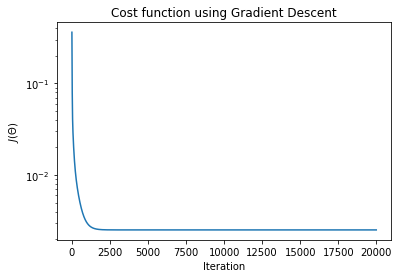

In [11]:
alpha =0.1
n_iter = 20000
N=np.size(x,1)
theta = np.random.randn(N+1,1)
#print(theta)
x_b = np.c_[np.ones((len(x),1)),x]
#print(x_b)
print(computeCost(theta,x_b,y))

theta,cost_history,theta_history = gradient_descent(x_b,y,theta,alpha,n_iter)

print(theta)
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

plt.plot(cost_history)
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

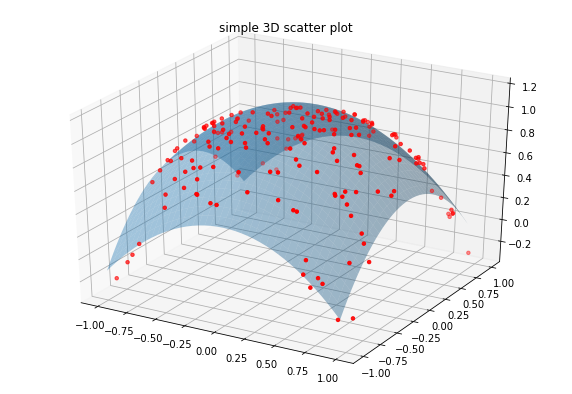

In [12]:
[XX,YY]=np.meshgrid(df[:,1],df[:,2])
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = theta[0]+theta[1]*X+theta[2]*Y+theta[3]*X**2+theta[4]*Y**2+theta[5]*X**3+theta[6]*Y**3

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                        antialiased=True, alpha=0.4)
# Creating plot
ax.scatter3D(df[:,1],df[:,2],test_func(df[:,1],df[:,2]), color = "red", s=12, label='data sample')
plt.title("simple 3D scatter plot")
# show plot
plt.show()

As can see in the final result of $\Theta$, the zero order term (bias term) has value close to 1, which is $f(0,0)$. \\
Also, only the coefficients in second order terms of $x$ and $y$ and the constant term are significant, while the others are 2 order of magnitude lower than them. That is as excepted, since $\cos(x^2+y^2)$ is even in $x$ and $y$.  Therefore any surviving term should have even orders in both $x$ and $y$.

In [13]:
df = pd.read_csv('/content/test_func_data.csv')
#print(df)

In [14]:
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x^4']=df['x']**4
df['y^4']=df['y']**4
df['x^2*y^2']=df['x']**2*df['y']**2
print(df)

       f(x,y)         x         y       x^2       y^2       x^4       y^4  \
0    0.689962 -0.554481  0.708456  0.307450  0.501910  0.094525  0.251914   
1    0.993603 -0.303724  0.144639  0.092248  0.020921  0.008510  0.000438   
2    0.672775 -0.890726 -0.198623  0.793393  0.039451  0.629472  0.001556   
3    0.631472 -0.140367 -0.931474  0.019703  0.867644  0.000388  0.752806   
4    0.998396 -0.148312 -0.186169  0.021997  0.034659  0.000484  0.001201   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.998748 -0.182850 -0.128922  0.033434  0.016621  0.001118  0.000276   
196  0.921766 -0.449341 -0.443032  0.201908  0.196277  0.040767  0.038525   
197  0.476730 -0.557863  0.873301  0.311211  0.762654  0.096852  0.581642   
198  0.658709 -0.289611 -0.876253  0.083875  0.767820  0.007035  0.589547   
199  0.490562 -0.621402  0.819707  0.386141  0.671920  0.149105  0.451477   

      x^2*y^2  
0    0.154312  
1    0.001930  
2    0.031300  
3    0.0170

In [15]:
df = df.to_numpy()
x = df[:,3:8]
y = [df[:,0]]
x = np.array(x)
#print(x)
y = np.array(y)
y = y.T
#print(y)

1.0318269036462835
[[ 1.01964322]
 [-0.14400402]
 [-0.13837283]
 [-0.32922568]
 [-0.33962106]
 [-0.6253898 ]]
Final cost/MSE:  0.00007


Text(0.5, 1.0, 'Cost function using Gradient Descent')

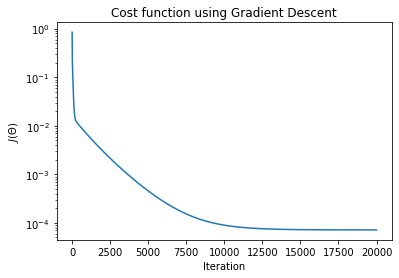

In [16]:
alpha =0.1
n_iter = 20000
N=np.size(x,1)
theta = np.random.randn(N+1,1)
#print(theta)
x_b = np.c_[np.ones((len(x),1)),x]
#print(x_b)
print(computeCost(theta,x_b,y))

theta,cost_history,theta_history = gradient_descent(x_b,y,theta,alpha,n_iter)

print(theta)
print('Final cost/MSE:  {:0.5f}'.format(cost_history[-1]))

plt.plot(cost_history)
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

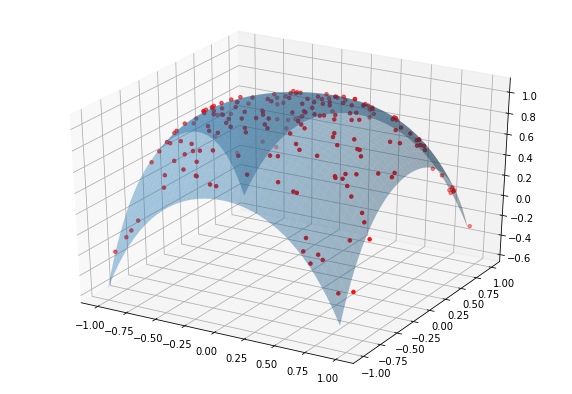

In [17]:
[XX,YY]=np.meshgrid(df[:,1],df[:,2])
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = theta[0]+theta[1]*X**2+theta[2]*Y**2+theta[3]*X**4+theta[4]*Y**4+theta[5]*X**2*Y**2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z,
                        antialiased=True, alpha=0.4, label='fit result')
# Creating plot
ax.scatter3D(df[:,1],df[:,2],test_func(df[:,1],df[:,2]), color = "red", s=12, label='data sample')
# show plot
plt.show()

As shown in the result, the final cost is much smaller than that of the previous case, even though we used 1 less term to fit.